# Analyse des prix des carburants

Voici un exemple décrit pas à pas qui montre comment on analyse des données publiques disponibles en ligne. Ici on va travailler sur le prix de différentes énergies à partir des données de la base Pégase du ministère du développement durable.

La première chose est de sauver les tables qui nous intéressent à savoir 
* les données annuelles par commune, département, secteur des inscriptions au brevet, taux de réussite.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dbpath = 'data/fr-en-dnb-par-etablissement.csv'

In [3]:
brevet_data = pd.read_csv(dbpath, sep=';')

brevet_data.head()

Session Numero d'etablissement Type d'etablissement  \
0     2014               0131711P              COLLEGE   
1     2014               0131756N              COLLEGE   
2     2014               0131923V              COLLEGE   
3     2014               0131943S              COLLEGE   
4     2014               0131968U              COLLEGE   

                 Patronyme Secteur d'enseignement Commune  \
0         ROCHER DU DRAGON                 PUBLIC   13001   
1           DARIUS MILHAUD                 PUBLIC   13212   
2           MARSEILLEVEYRE                 PUBLIC   13208   
3             PIERRE PUGET                 PUBLIC   13206   
4  CAILLOLS (QUARTIER DES)                 PUBLIC   13212   

                 Libellé commune Code département Libellé département  \
0                AIX-EN-PROVENCE              013    BOUCHES-DU-RHONE   
1  MARSEILLE 12E  ARRONDISSEMENT              013    BOUCHES-DU-RHONE   
2   MARSEILLE 8E  ARRONDISSEMENT              013    BOUCHES-DU-RHONE   
3  MARSEILLE  6E  ARRONDISSEMENT              013    BOUCHES-DU-RHONE   
4  MARSEILLE 12E  ARRONDISSEMENT              013    BOUCHES-DU-RHONE   

   Code académie  ... Code région              Libellé région Inscrits  \
0              2  ...          18  PROVENCE-ALPES-COTE D'AZUR      163   
1              2  ...          18  PROVENCE-ALPES-COTE D'AZUR      153   
2              2  ...          18  PROVENCE-ALPES-COTE D'AZUR      262   
3              2  ...          18  PROVENCE-ALPES-COTE D'AZUR      157   
4              2  ...          18  PROVENCE-ALPES-COTE D'AZUR      138   

   Presents  Admis  Admis sans mention  Nombre_d_admis_Mention_AB  \
0       159    143                  52                         43   
1       143    109                  49                         25   
2       256    236                  63                         81   
3       153    114                  46                         31   
4       138    106                  45                         31   

   Admis Mention bien  Admis Mention très bien  Taux de réussite  
0                  29                       19            89,90%  
1                  21                       14            76,20%  
2                  59                       33            92,10%  
3                  24                       13            74,50%  
4                  20                       10            76,80%  

[5 rows x 21 columns]

# Cleaning data

In [4]:
# On enlève les 0 devant les codes des départements
brevet_data['Code département'] = brevet_data['Code département'].map(lambda x: str(x)[1:])

# On renomme les colonnes des mentions
brevet_data.rename(columns = {'Nombre_d_admis_Mention_AB':'Admis Mention AB', 'Admis Mention bien':'Admis Mention B', 'Admis Mention très bien':'Admis Mention TB'}, inplace = True)

# Admis avec mention bien ou plus
brevet_data['Admis Mention B+'] = brevet_data['Admis Mention B'] + brevet_data['Admis Mention TB']

# Admis avec mention  assez bien ou plus (avec mention)
brevet_data['Admis Mention AB+'] = brevet_data['Admis Mention AB'] + brevet_data['Admis Mention B+']

# Taux de réussite
brevet_data['Taux de réussite'] =  brevet_data['Admis'] / brevet_data['Presents']
brevet_data

Session Numero d'etablissement Type d'etablissement  \
0          2014               0131711P              COLLEGE   
1          2014               0131756N              COLLEGE   
2          2014               0131923V              COLLEGE   
3          2014               0131943S              COLLEGE   
4          2014               0131968U              COLLEGE   
...         ...                    ...                  ...   
130759     2020               0930623X              COLLEGE   
130760     2020               0930831Y  LYCEE PROFESSIONNEL   
130761     2020               0930858C              COLLEGE   
130762     2020               0930920V              COLLEGE   
130763     2020               0930969Y              COLLEGE   

                          Patronyme Secteur d'enseignement Commune  \
0                  ROCHER DU DRAGON                 PUBLIC   13001   
1                    DARIUS MILHAUD                 PUBLIC   13212   
2                    MARSEILLEVEYRE                 PUBLIC   13208   
3                      PIERRE PUGET                 PUBLIC   13206   
4           CAILLOLS (QUARTIER DES)                 PUBLIC   13212   
...                             ...                    ...     ...   
130759                  JEAN MOULIN                 PUBLIC   93049   
130760              ARISTIDE BRIAND                 PUBLIC   93007   
130761                 PABLO NERUDA                 PUBLIC   93032   
130762                 SAINTE MARIE                  PRIVE   93072   
130763  SAINT LOUIS-SAINTE CLOTILDE                  PRIVE   93062   

                      Libellé commune Code département Libellé département  \
0                     AIX-EN-PROVENCE               13    BOUCHES-DU-RHONE   
1       MARSEILLE 12E  ARRONDISSEMENT               13    BOUCHES-DU-RHONE   
2        MARSEILLE 8E  ARRONDISSEMENT               13    BOUCHES-DU-RHONE   
3       MARSEILLE  6E  ARRONDISSEMENT               13    BOUCHES-DU-RHONE   
4       MARSEILLE 12E  ARRONDISSEMENT               13    BOUCHES-DU-RHONE   
...                               ...              ...                 ...   
130759              NEUILLY-PLAISANCE               93   SEINE-SAINT-DENIS   
130760                LE BLANC-MESNIL               93   SEINE-SAINT-DENIS   
130761                          GAGNY               93   SEINE-SAINT-DENIS   
130762                         STAINS               93   SEINE-SAINT-DENIS   
130763                      LE RAINCY               93   SEINE-SAINT-DENIS   

        Code académie  ... Inscrits  Presents Admis  Admis sans mention  \
0                   2  ...      163       159   143                  52   
1                   2  ...      153       143   109                  49   
2                   2  ...      262       256   236                  63   
3                   2  ...      157       153   114                  46   
4                   2  ...      138       138   106                  45   
...               ...  ...      ...       ...   ...                 ...   
130759             24  ...      190       190   166                  40   
130760             24  ...       19        19    17                   9   
130761             24  ...      146       146   114                  32   
130762             24  ...      110       110   104                  25   
130763             24  ...      156       156   156                   8   

        Admis Mention AB  Admis Mention B  Admis Mention TB  Taux de réussite  \
0                     43               29                19          0.899371   
1                     25               21                14          0.762238   
2                     81               59                33          0.921875   
3                     31               24                13          0.745098   
4                     31               20                10          0.768116   
...                  ...              ...               ...               ...   
13075

In [5]:
brevet_data2 = brevet_data.set_index(['Session', "Numero d'etablissement"])
brevet_data2

Type d'etablissement  \
Session Numero d'etablissement                        
2014    0131711P                            COLLEGE   
        0131756N                            COLLEGE   
        0131923V                            COLLEGE   
        0131943S                            COLLEGE   
        0131968U                            COLLEGE   
...                                             ...   
2020    0930623X                            COLLEGE   
        0930831Y                LYCEE PROFESSIONNEL   
        0930858C                            COLLEGE   
        0930920V                            COLLEGE   
        0930969Y                            COLLEGE   

                                                  Patronyme  \
Session Numero d'etablissement                                
2014    0131711P                           ROCHER DU DRAGON   
        0131756N                             DARIUS MILHAUD   
        0131923V                             MARSEILLEVEYRE   
        0131943S                               PIERRE PUGET   
        0131968U                    CAILLOLS (QUARTIER DES)   
...                                                     ...   
2020    0930623X                                JEAN MOULIN   
        0930831Y                            ARISTIDE BRIAND   
        0930858C                               PABLO NERUDA   
        0930920V                               SAINTE MARIE   
        0930969Y                SAINT LOUIS-SAINTE CLOTILDE   

                               Secteur d'enseignement Commune  \
Session Numero d'etablissement                                  
2014    0131711P                               PUBLIC   13001   
        0131756N                               PUBLIC   13212   
        0131923V                               PUBLIC   13208   
        0131943S                               PUBLIC   13206   
        0131968U                               PUBLIC   13212   
...                                               ...     ...   
2020    0930623X                               PUBLIC   93049   
        0930831Y                               PUBLIC   93007   
        0930858C                               PUBLIC   93032   
        0930920V                                PRIVE   93072   
        0930969Y                                PRIVE   93062   

                                              Libellé commune  \
Session Numero d'etablissement                                  
2014    0131711P                              AIX-EN-PROVENCE   
        0131756N                MARSEILLE 12E  ARRONDISSEMENT   
        0131923V                 MARSEILLE 8E  ARRONDISSEMENT   
        0131943S                MARSEILLE  6E  ARRONDISSEMENT   
        0131968U                MARSEILLE 12E  ARRONDISSEMENT   
...                                                       ...   
2020    0930623X                            NEUILLY-PLAISANCE   
        0930831Y                              LE BLANC-MESNIL   
        0930858C                                        GAGNY   
        0930920V                                       STAINS   
        0930969Y                                    LE RAINCY   

                               Code département Libellé département  \
Session Numero d'etablissement                                        
2014    0131711P                             13    BOUCHES-DU-RHONE   
        0131756N                             13    BOUCHES-DU-RHONE   
        0131923V                             13    BOUCHES-DU-RHONE   
        0131943S                             13    BOUCHES-DU-RHONE   
        0131968U                             13    BOUCHES-DU-RHONE   
...                                         ...                 ...   
2020    0930623X                             93   SEINE-SAINT-DENIS   
        0930831Y                             93   SEINE-SAINT-DENIS   
        0930858C                             93   SEINE-SAINT-DENIS   
        0930920V      

## Notre collège

In [6]:
brevet_data[brevet_data["Patronyme"] == "LES FRANCS BOURGEOIS"]

Session Numero d'etablissement Type d'etablissement  \
13455      2013               0752902X              COLLEGE   
14479      2009               0752902X              COLLEGE   
17711      2020               0752902X              COLLEGE   
40071      2014               0752902X              COLLEGE   
41923      2011               0752902X              COLLEGE   
57939      2012               0752902X              COLLEGE   
65156      2007               0752902X              COLLEGE   
73468      2017               0752902X              COLLEGE   
93499      2008               0752902X              COLLEGE   
109022     2010               0752902X              COLLEGE   
114038     2006               0752902X              COLLEGE   
116884     2018               0752902X              COLLEGE   
118634     2019               0752902X              COLLEGE   
119402     2016               0752902X              COLLEGE   
121626     2015               0752902X              COLLEGE   

                   Patronyme Secteur d'enseignement Commune  \
13455   LES FRANCS BOURGEOIS                  PRIVE   75104   
14479   LES FRANCS BOURGEOIS                  PRIVE   75104   
17711   LES FRANCS BOURGEOIS                  PRIVE   75104   
40071   LES FRANCS BOURGEOIS                  PRIVE   75104   
41923   LES FRANCS BOURGEOIS                  PRIVE   75104   
57939   LES FRANCS BOURGEOIS                  PRIVE   75104   
65156   LES FRANCS BOURGEOIS                  PRIVE   75104   
73468   LES FRANCS BOURGEOIS                  PRIVE   75104   
93499   LES FRANCS BOURGEOIS                  PRIVE   75104   
109022  LES FRANCS BOURGEOIS                  PRIVE   75104   
114038  LES FRANCS BOURGEOIS                  PRIVE   75104   
116884  LES FRANCS BOURGEOIS                  PRIVE   75104   
118634  LES FRANCS BOURGEOIS                  PRIVE   75104   
119402  LES FRANCS BOURGEOIS                  PRIVE   75104   
121626  LES FRANCS BOURGEOIS                  PRIVE   75104   

                  Libellé commune Code département Libellé département  \
13455   PARIS  4E  ARRONDISSEMENT               75               PARIS   
14479   PARIS  4E  ARRONDISSEMENT               75               PARIS   
17711   PARIS  4E  ARRONDISSEMENT               75               PARIS   
40071   PARIS  4E  ARRONDISSEMENT               75               PARIS   
41923   PARIS  4E  ARRONDISSEMENT               75               PARIS   
57939   PARIS  4E  ARRONDISSEMENT               75               PARIS   
65156   PARIS  4E  ARRONDISSEMENT               75               PARIS   
73468   PARIS  4E  ARRONDISSEMENT               75               PARIS   
93499   PARIS  4E  ARRONDISSEMENT               75               PARIS   
109022  PARIS  4E  ARRONDISSEMENT               75               PARIS   
114038  PARIS  4E  ARRONDISSEMENT               75               PARIS   
116884  PARIS  4E  ARRONDISSEMENT               75               PARIS   
118634  PARIS  4E  ARRONDISSEMENT               75               PARIS   
119402  PARIS  4E  ARRONDISSEMENT               75               PARIS   
121626  PARIS  4E  ARRONDISSEMENT               75               PARIS   

        Code académie  ... Inscrits  Presents Admis  Admis sans mention  \
13455               1  ...      240       240   240                  15   
14479               1  ...      231       230   228                  30   
17711               1  ...      260       260   260                  20   
40071               1  ...      258       258   258                  29   
41923               1  ...      249       249   248                  26   
57939               1  ...      246       246   245                  17   
65156               1  ...      234       231   228                  30   
73468               1  ...      255       255   254                  36   
93499               1  ...      236       235   234                  33   
109022              1  ...      248       247   246    

# Moyennes des taux de réussite des établissements par département

In [7]:
import folium

In [8]:
france = folium.Map(location=[46.5,2], zoom_start=5, tiles='Stamen Toner')

colors = folium.Choropleth(geo_data = 'data/departements-version-simplifiee.geojson',
                           data = brevet_data,
                           columns = ['Code département', 'Taux de réussite'],
                           key_on = 'feature.properties.code',
                           fill_color = 'YlOrRd',
                           fill_opacity = 0.6,
                           line_opacity = 0.2,
                           legend_name = "Taux de réussite"
                          )
colors.add_to(france)
folium.LayerControl().add_to(france)
france

## Number of students per session

In [9]:
brevet_data.groupby('Session')['Presents'].sum()

Session
2006    746534
2007    736961
2008    716484
2009    709965
2010    724086
2011    742462
2012    757587
2013    759891
2014    772825
2015    800531
2016    800995
2017    798720
2018    796930
2019    804116
2020    829164
Name: Presents, dtype: int64

# Taux de réussite par secteur (privé/public)

In [10]:
brevet_data.groupby('Secteur d\'enseignement')['Admis'].sum() / brevet_data.groupby('Secteur d\'enseignement')['Presents'].sum()

Secteur d'enseignement
-         0.833316
PRIVE     0.938826
PUBLIC    0.832538
dtype: float64

# On s'intéresse aux taux de réussite et de mentions par année selon le secteur d'enseignement (Public / Privé)

In [11]:
# On garde uniquement les établissements privés et publics
data_brevet_par_annee_par_secteur = brevet_data[brevet_data['Secteur d\'enseignement'] != "-"].groupby(['Session', 'Secteur d\'enseignement'])

In [12]:
# On fait les sommes des Présents, des Admis, des Admis avec mentions, des Admis avec mentions Bien ou Très Bien, et des admis avec mention Très Bien
data_brevet_par_annee_par_secteur = data_brevet_par_annee_par_secteur.agg(Presents = ('Presents', 'sum'),
                                      Admis = ('Admis', 'sum'),
                                      AvecMention = ('Admis Mention AB+', 'sum'),
                                      B_TB = ('Admis Mention B+', 'sum'),
                                      TB = ('Admis Mention TB', 'sum'))
data_brevet_par_annee_par_secteur

Presents   Admis  AvecMention    B_TB      TB
Session Secteur d'enseignement                                               
2006    PRIVE                     167677  150883        80736   32704    7676
        PUBLIC                    578204  441362       214951   94160   24799
2007    PRIVE                     166059  152241        93128   39808    9651
        PUBLIC                    570140  455193       254887  117829   33265
2008    PRIVE                     164841  151601        97500   42717   10871
        PUBLIC                    551042  443531       259699  123580   36801
2009    PRIVE                     163524  151631        95663   41132   10077
        PUBLIC                    545758  442229       254043  117940   33761
2010    PRIVE                     166526  155019       101023   45632   11945
        PUBLIC                    556928  455705       270505  131250   40034
2011    PRIVE                     170706  159731       102766   47821   13200
        PUBLIC                    571279  466684       268653  132114   42286
2012    PRIVE                     173380  163597       115196   56707   16709
        PUBLIC                    582916  485096       307721  160940   54720
2013    PRIVE                     173500  162898       109838   55497   17753
        PUBLIC                    585838  485212       291485  153432   55312
2014    PRIVE                     175206  164909       109791   54655   17055
        PUBLIC                    597041  497265       294864  153191   54923
2015    PRIVE                     180603  171324       123588   68180   24433
        PUBLIC                    619554  523622       334831  188821   76561
2016    PRIVE                     181505  173488       126216   70313   25483
        PUBLIC                    619144  528637       334917  188802   76188
2017    PRIVE                     181618  173291       145690  105963   55995
        PUBLIC                    616119  539564       421104  291261  155439
2018    PRIVE                     181395  171760       141669  101326   50687
        PUBLIC                    614903  526238       389514  259233  131902
2019    PRIVE                     182733  173046       138676   96362   46488
        PUBLIC                    620769  525857       375883  242408  120709
2020    PRIVE                     187299  181086       155521  118113   58769
        PUBLIC                    641379  569263       451252  332620  185715

# On calcule les taux en divisant les colonnes par le nombre d'élèves présents

In [13]:
cols_to_divide = ['Admis', 'AvecMention', 'B_TB', 'TB']
data_brevet_par_annee_par_secteur.loc[:, cols_to_divide] = data_brevet_par_annee_par_secteur.loc[:, cols_to_divide].div(data_brevet_par_annee_par_secteur['Presents'], axis=0)
data_brevet_par_annee_par_secteur = data_brevet_par_annee_par_secteur.reset_index()
data_brevet_par_annee_par_secteur = data_brevet_par_annee_par_secteur.drop(data_brevet_par_annee_par_secteur[data_brevet_par_annee_par_secteur["Secteur d'enseignement"] == "-"].index)
data_brevet_par_annee_par_secteur

Session Secteur d'enseignement  Presents     Admis  AvecMention      B_TB  \
0      2006                  PRIVE    167677  0.899843     0.481497  0.195042   
1      2006                 PUBLIC    578204  0.763333     0.371756  0.162849   
2      2007                  PRIVE    166059  0.916789     0.560813  0.239722   
3      2007                 PUBLIC    570140  0.798388     0.447060  0.206667   
4      2008                  PRIVE    164841  0.919680     0.591479  0.259141   
5      2008                 PUBLIC    551042  0.804895     0.471287  0.224266   
6      2009                  PRIVE    163524  0.927271     0.585009  0.251535   
7      2009                 PUBLIC    545758  0.810302     0.465487  0.216103   
8      2010                  PRIVE    166526  0.930900     0.606650  0.274023   
9      2010                 PUBLIC    556928  0.818248     0.485709  0.235668   
10     2011                  PRIVE    170706  0.935708     0.602006  0.280137   
11     2011                 PUBLIC    571279  0.816911     0.470266  0.231260   
12     2012                  PRIVE    173380  0.943575     0.664413  0.327068   
13     2012                 PUBLIC    582916  0.832189     0.527899  0.276095   
14     2013                  PRIVE    173500  0.938893     0.633072  0.319867   
15     2013                 PUBLIC    585838  0.828236     0.497552  0.261902   
16     2014                  PRIVE    175206  0.941229     0.626639  0.311947   
17     2014                 PUBLIC    597041  0.832882     0.493876  0.256584   
18     2015                  PRIVE    180603  0.948622     0.684308  0.377513   
19     2015                 PUBLIC    619554  0.845160     0.540439  0.304769   
20     2016                  PRIVE    181505  0.955830     0.695386  0.387389   
21     2016                 PUBLIC    619144  0.853819     0.540936  0.304940   
22     2017                  PRIVE    181618  0.954151     0.802178  0.583439   
23     2017                 PUBLIC    616119  0.875746     0.683478  0.472735   
24     2018                  PRIVE    181395  0.946884     0.780997  0.558593   
25     2018                 PUBLIC    614903  0.855807     0.633456  0.421584   
26     2019                  PRIVE    182733  0.946988     0.758900  0.527338   
27     2019                 PUBLIC    620769  0.847106     0.605512  0.390496   
28     2020                  PRIVE    187299  0.966828     0.830335  0.630612   
29     2020                 PUBLIC    641379  0.887561     0.703565  0.518601   

          TB  
0   0.045778  
1   0.042890  
2   0.058118  
3   0.058345  
4   0.065948  
5   0.066784  
6   0.061624  
7   0.061861  
8   0.071731  
9   0.071884  
10  0.077326  
11  0.074020  
12  0.096372  
13  0.093873  
14  0.102323  
15  0.094415  
16  0.097343  
17  0.091992  
18  0.135286  
19  0.123574  
20  0.140398  
21  0.123054  
22  0.308312  
23  0.252287  
24  0.279429  
25  0.214509  
26  0.254404  
27  0.194451  
28  0.313771  
29  0.289556

# On affiche les graphiques

In [14]:
import seaborn as sns

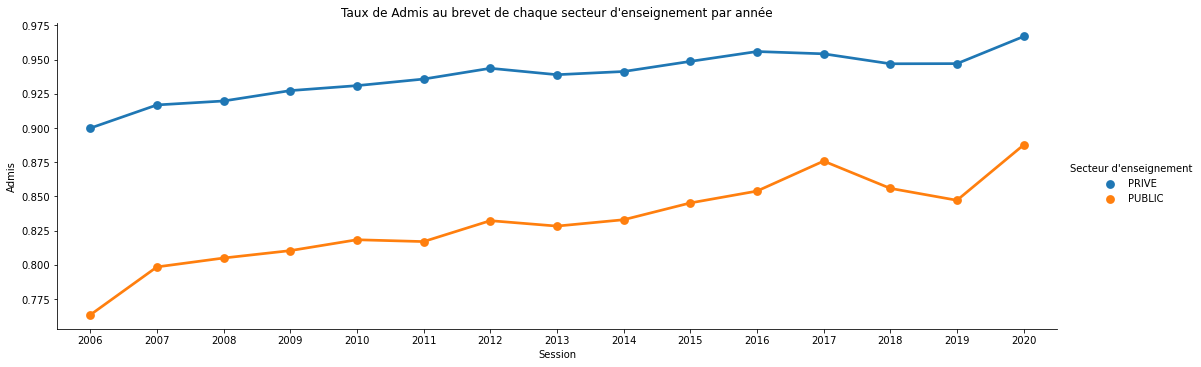

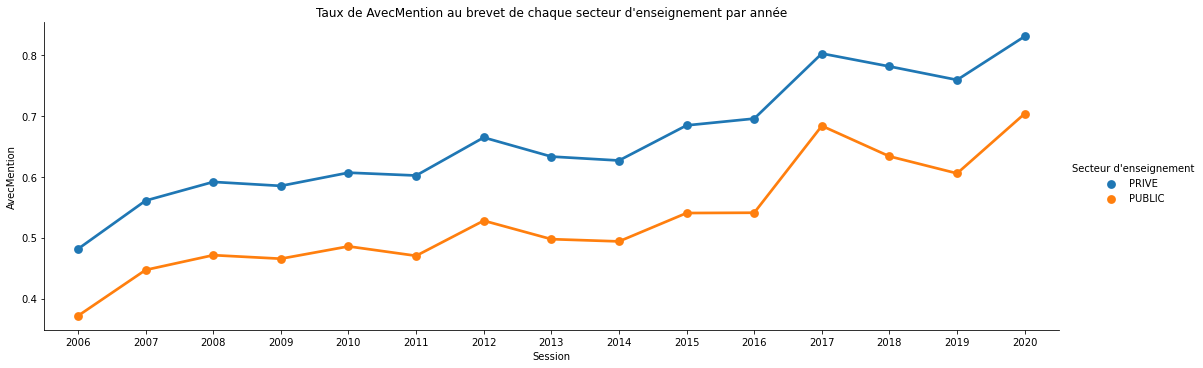

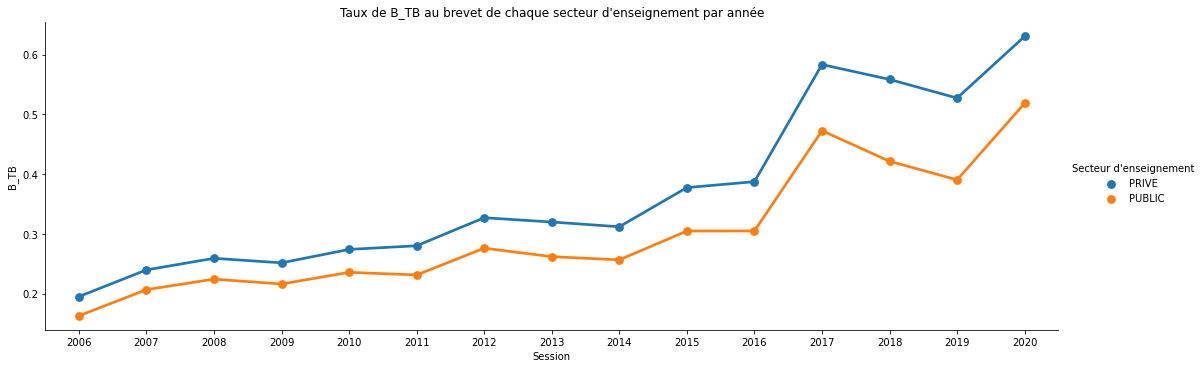

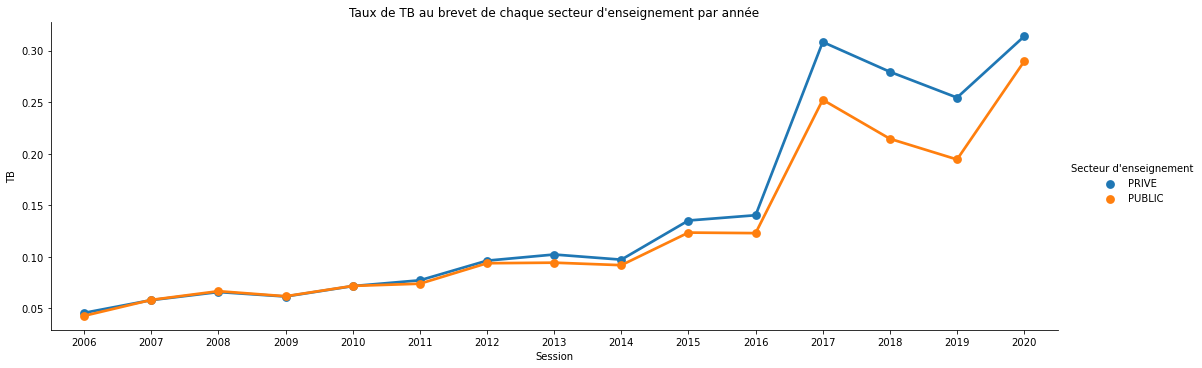

In [27]:
for c in cols_to_divide:
    g = sns.catplot(data=data_brevet_par_annee_par_secteur, x='Session', y = c, hue="Secteur d'enseignement", kind = 'point', aspect = 3, title = c)
    g.set(title=f"Taux de {c} au brevet de chaque secteur d'enseignement par année")

Globalement le taux de réussite dans les lycées privés est plus élevé que dans les lycées publics.

Cependant l'écart se reserre, on passe d'une différence de 15% en 2006 à 7.5% en 2020.

On remarque une légère augmentation du taux réussite entre 2006 et 2020 pour les 2 secteurs.

Une chute du taux de réussite dans le secteur public est notable entre 2017 et 2019 ( -5% )

# Nombre d'inscrits par secteur

In [19]:
inscrits_secteur = brevet_data.groupby('Secteur d\'enseignement')['Inscrits'].sum()
inscrits_secteur

Secteur d'enseignement
-           10464
PRIVE     2638965
PUBLIC    9040378
Name: Inscrits, dtype: int64

# Calcul du nombre d'inscrits au brevet dans les plus grandes villes ( > 50 000 habitants ) 

In [20]:
habitant_ville = pd.read_csv('data/habitant_par_ville.csv', sep=';')
grandes_villes = habitant_ville[habitant_ville["Population municipale (historique depuis 1876) 2018"] >= 50000]["Libellé"].tolist()
grandes_villes = [each_string.upper() for each_string in grandes_villes]
grandes_villes

['SAINT-QUENTIN',
 'ANTIBES',
 'CAGNES-SUR-MER',
 'CANNES',
 'NICE',
 'TROYES',
 'NARBONNE',
 'AIX-EN-PROVENCE',
 'ARLES',
 'MARSEILLE',
 'CAEN',
 'LA ROCHELLE',
 'BOURGES',
 'DIJON',
 'BESANÇON',
 'VALENCE',
 'BREST',
 'QUIMPER',
 'AJACCIO',
 'NÎMES',
 'TOULOUSE',
 'BORDEAUX',
 'MÉRIGNAC',
 'PESSAC',
 'BÉZIERS',
 'MONTPELLIER',
 'RENNES',
 'TOURS',
 'GRENOBLE',
 'SAINT-ÉTIENNE',
 'NANTES',
 'SAINT-NAZAIRE',
 'ORLÉANS',
 'ANGERS',
 'CHOLET',
 'CHERBOURG-EN-COTENTIN',
 'REIMS',
 'NANCY',
 'LORIENT',
 'VANNES',
 'METZ',
 "VILLENEUVE-D'ASCQ",
 'DUNKERQUE',
 'LILLE',
 'ROUBAIX',
 'TOURCOING',
 'BEAUVAIS',
 'CALAIS',
 'CLERMONT-FERRAND',
 'BAYONNE',
 'PAU',
 'PERPIGNAN',
 'STRASBOURG',
 'COLMAR',
 'MULHOUSE',
 'LYON',
 'VAULX-EN-VELIN',
 'VÉNISSIEUX',
 'VILLEURBANNE',
 'LE MANS',
 'CHAMBÉRY',
 'ANNECY',
 'PARIS',
 'LE HAVRE',
 'ROUEN',
 'CHELLES',
 'MEAUX',
 'SARTROUVILLE',
 'VERSAILLES',
 'NIORT',
 'AMIENS',
 'MONTAUBAN',
 'FRÉJUS',
 'HYÈRES',
 'LA SEYNE-SUR-MER',
 'TOULON',
 'AVIGNON',
 '

In [21]:
inscrits_par_ville = []
for ville in grandes_villes:
    ## pour chaque ville je calcule le nombre d'inscrits par année depuis 2006
    sub_df = brevet_data.loc[brevet_data['Libellé commune'].str.startswith(ville)]
    sum = sub_df.groupby('Session')['Inscrits'].sum()
    inscrits_par_ville.append(sum)

Text(0.5, 1.0, "Nombre d'inscrits au brevet dans les grandes villes ( > 50 000 habitants) de 2006 à 2020")

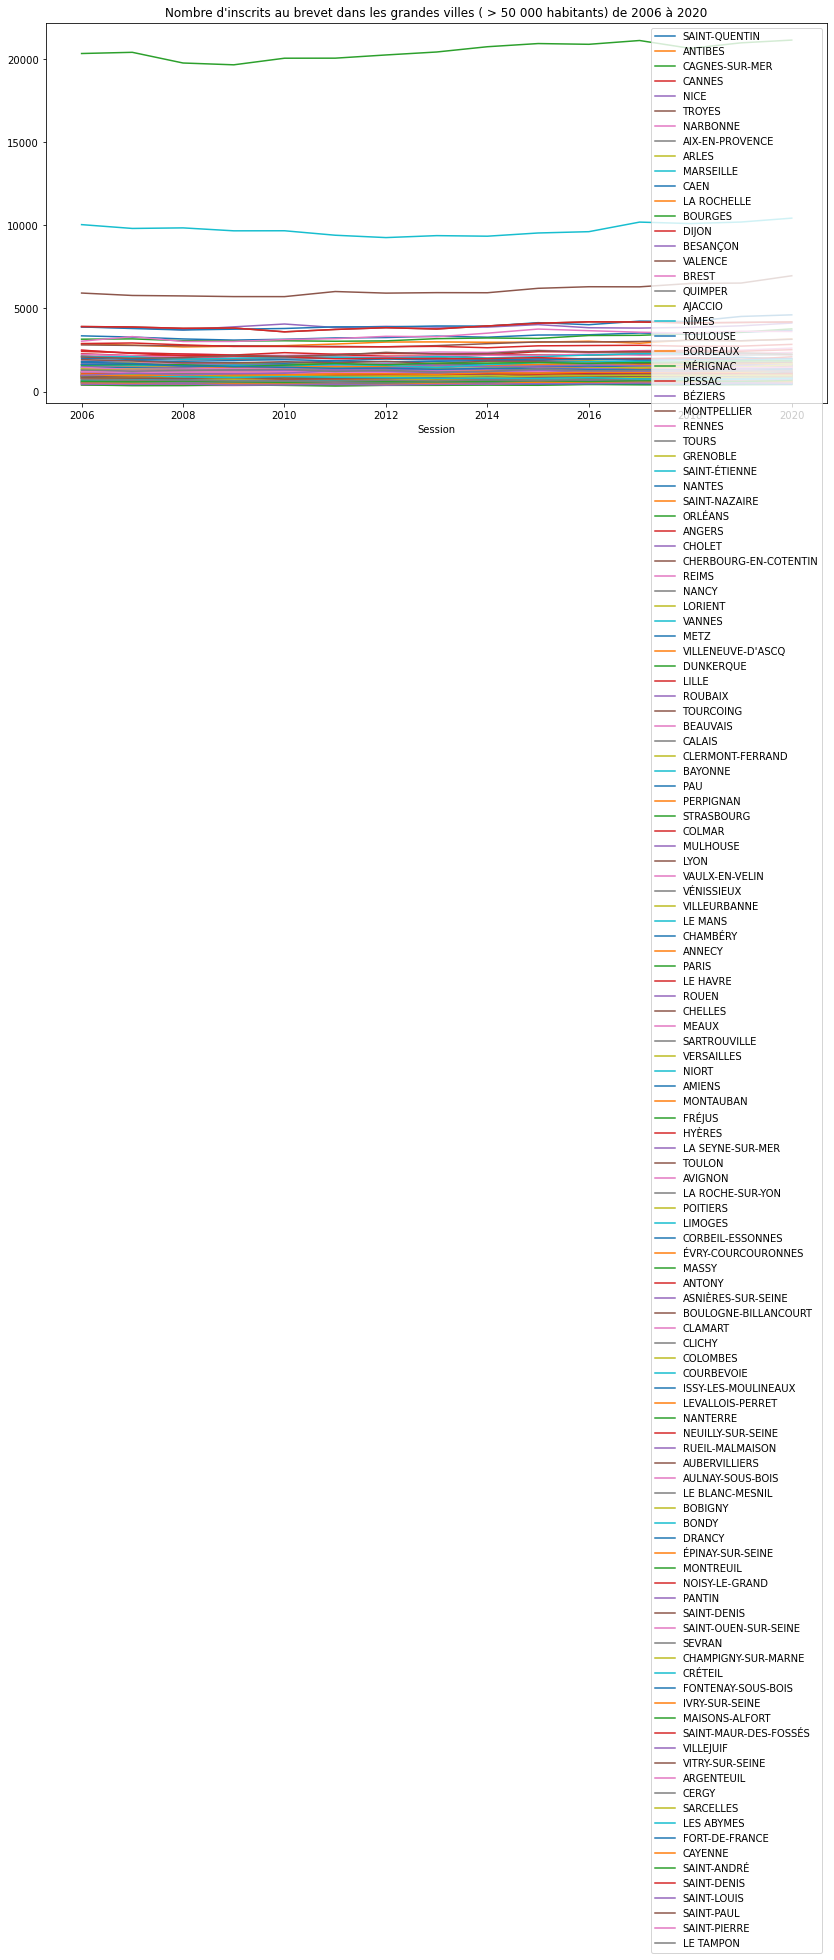

In [22]:
inscrits_par_ville_df = pd.concat(inscrits_par_ville, axis=1, keys=[s.name for s in inscrits_par_ville])
inscrits_par_ville_df.columns = grandes_villes
inscrits_par_ville_df.plot(figsize=(14, 7))
plt.title('Nombre d\'inscrits au brevet dans les grandes villes ( > 50 000 habitants) de 2006 à 2020')

Le nombre d'inscrits au brevet dans les plus grandes villes reste constant de 2006 à 2020

In [23]:
inscrits_par_ville_df['Total sur les grandes villes'] = inscrits_par_ville_df.sum(axis=1)
inscrits_par_ville_df['Total en France'] = brevet_data.groupby('Session')['Inscrits'].sum()

In [24]:
values = inscrits_par_ville_df['Total sur les grandes villes'] / inscrits_par_ville_df['Total en France'] * 100
inscrits_par_ville_df['Total grandes villes / Total France en %'] = values

In [25]:
inscrits_par_ville_df

SAINT-QUENTIN  ANTIBES  CAGNES-SUR-MER  CANNES  NICE  TROYES  \
Session                                                                 
2006               899      894             419     929  3888    1014   
2007               853      854             430     965  3846    1047   
2008               830      777             415     874  3723     924   
2009               798      838             462     969  3896    1062   
2010               874      857             430     946  4067     985   
2011               887      900             472     987  3857    1030   
2012               900      877             420    1005  3925     938   
2013               893      814             434     984  3882     964   
2014               864      894             426     949  3882     988   
2015               860      853             408     930  4030    1033   
2016               898      891             426    1000  3842    1040   
2017               874      906             422     992  3822    1028   
2018               829      844             399     964  3865     980   
2019               888      847             415     942  3959    1049   
2020               940      894             425     988  4123    1074   

         NARBONNE  AIX-EN-PROVENCE  ARLES  MARSEILLE  ...  CAYENNE  \
Session                                               ...            
2006          914             2142    823      10045  ...     1009   
2007          821             1999    798       9815  ...      956   
2008          753             1995    757       9849  ...     1000   
2009          793             1955    773       9672  ...     1005   
2010          764             1952    774       9676  ...     1013   
2011          858             2042    746       9407  ...     1056   
2012          859             1971    784       9265  ...     1073   
2013          885             1985    739       9383  ...     1042   
2014          854             1940    750       9349  ...     1135   
2015          923             1963    843       9542  ...     1112   
2016          967             1987    862       9621  ...     1171   
2017          912             2004    821      10197  ...     1166   
2018          897             1999    834      10109  ...     1192   
2019          941             1956    881      10201  ...     1169   
2020          945             1962    856      10435  ...     1239   

         SAINT-ANDRÉ  SAINT-DENIS  SAINT-LOUIS  SAINT-PAUL  SAINT-PIERRE  \
Session                                                                    
2006             NaN         3915          977        2078          3034   
2007             NaN         3887         1109        2000          3310   
2008             NaN         3807         1011        2046          3017   
2009             NaN         3827         1073        2177          3017   
2010             NaN         3597         1105        2128          3132   
2011             NaN         3740         1273        2195          3186   
2012             NaN         3844         1229        2362          3326   
2013             NaN         3768         1138        2265          3302   
2014             NaN         3950         1203        2288          3516   
2015             NaN         4112         1288        2463          3763   
2016             NaN         4198         1252        2377          3666   
2017             NaN         4188         1235        2380          3573   
2018             NaN         4135         1203        2370          3512   
2019             NaN         4161         1344        2331          3632   
2020             NaN         4188         1198        2234          3616   

         LE TAMPON  Total sur les grandes villes  Total en France  \
Session                                                             
2006          1304                      182002.0           760023   
2007          1231                      179151.0           751993   
2008   

Text(0.5, 1.0, 'Total grandes villes / Total France en %')

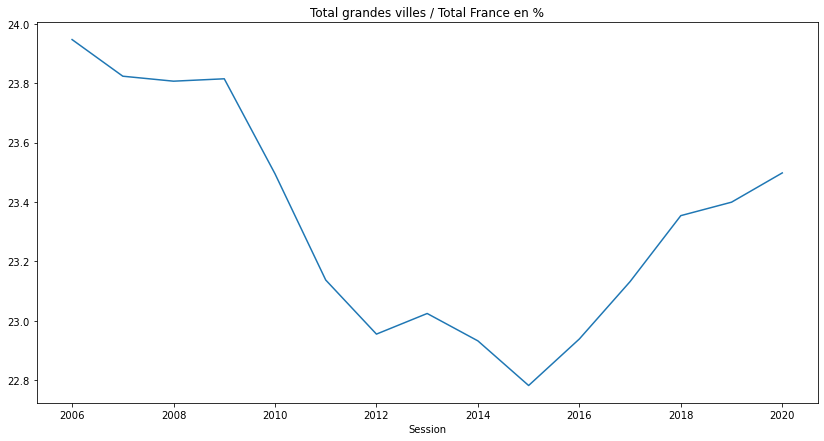

In [26]:
inscrits_par_ville_df['Total grandes villes / Total France en %'].plot(figsize=(14, 7))
plt.title('Total grandes villes / Total France en %')

On peut remarquer une baisse de 1.2 %  du nombre d'inscrits au brevet dans les grandes villes de 2006 à 2016